In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [88]:
data = pd.read_csv('checkins.csv', sep='|')
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916.0,5222.0,,,2012-04-21 17:39:01
1,984222,15824.0,5222.0,38.8951118,-77.0363658,2012-04-21 17:43:47
2,984315,1764391.0,5222.0,,,2012-04-21 17:37:18
3,984234,44652.0,5222.0,33.800745,-84.41052,2012-04-21 17:43:43
4,984249,2146840.0,5222.0,,,2012-04-21 17:42:58


## Clear data
rename column labels

In [89]:
data = data.rename({'     latitude      ': 'latitude', '     longitude     ': 'longitude',
             '     created_at      ': 'created_at', '   id    ': 'id', ' user_id ': 'user_id', ' venue_id ': 'venue_id'},
           axis='columns')
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916.0,5222.0,,,2012-04-21 17:39:01
1,984222,15824.0,5222.0,38.8951118,-77.0363658,2012-04-21 17:43:47
2,984315,1764391.0,5222.0,,,2012-04-21 17:37:18
3,984234,44652.0,5222.0,33.800745,-84.41052,2012-04-21 17:43:43
4,984249,2146840.0,5222.0,,,2012-04-21 17:42:58


remove rows with no coordinats data

In [90]:
bad_rows = data[data['latitude'] == '                   '].index
data = data.drop(bad_rows, axis=0)

In [91]:
data = data.reset_index().drop('index', axis=1)
cleared_data = data.drop(['id', 'user_id', 'venue_id', 'created_at'], axis=1)

In [92]:
cleared_data['latitude'] = cleared_data['latitude'].apply(float)
cleared_data['longitude'] = cleared_data['longitude'].apply(float)
train_data = cleared_data.iloc[0:100000]

## Learning clustering

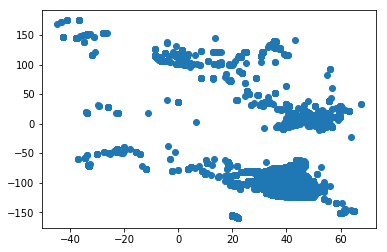

In [93]:
pylab.scatter(x=train_data['latitude'], y=train_data['longitude'])

In [94]:
clasterizer = MeanShift(bandwidth=0.1)

In [95]:
X = train_data.as_matrix()

In [96]:
y = clasterizer.fit_predict(X)

In [97]:
train_data['clusters'] = y
train_data.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,latitude,longitude,clusters
0,38.895112,-77.036366,5
1,33.800745,-84.410520,7
2,45.523452,-122.676207,30
3,40.764462,-111.904565,66
4,33.448377,-112.074037,1


## Process clastering results
delete clusters with less than 15 points

In [98]:
clust_size = train_data.groupby(by='clusters').size()
clust_size[595]

bad_idx = train_data[train_data['clusters'] > 595].index
cleared_clusters = train_data.drop(bad_idx, axis=0)

In [99]:
center_latitude = [t[0] for t in clasterizer.cluster_centers_][:596]
center_longitude = [t[1] for t in clasterizer.cluster_centers_][:596]

In [73]:
clothest_clusters = pd.DataFrame(columns=['cluster_id', 'latitude', 'longitude'])

clothest_clusters['cluster_id'] = range(596)
clothest_clusters['latitude'] = center_latitude
clothest_clusters['longitude'] = center_longitude
clothest_clusters['office_0'] = [float(t) for t in range(596)]
clothest_clusters['office_1'] = [float(t) for t in range(596)]
clothest_clusters['office_2'] = [float(t) for t in range(596)]
clothest_clusters['office_3'] = [float(t) for t in range(596)]
clothest_clusters['office_4'] = [float(t) for t in range(596)]
clothest_clusters['office_5'] = [float(t) for t in range(596)]

clothest_clusters.head()

,cluster_id,latitude,longitude,office_0,office_1,office_2,office_3,office_4,office_5
0,0,40.717716,-73.991835,0.0,0.0,0.0,0.0,0.0,0.0
1,1,33.449438,-112.002140,1.0,1.0,1.0,1.0,1.0,1.0
2,2,33.446380,-111.901888,2.0,2.0,2.0,2.0,2.0,2.0
3,3,41.878244,-87.629843,3.0,3.0,3.0,3.0,3.0,3.0
4,4,37.688682,-122.409330,4.0,4.0,4.0,4.0,4.0,4.0


In [86]:
offices = [[33.751277, -118.188740], [25.867736, -80.324116], [51.503016, -0.075479], [52.378894, 4.885084], [39.366487, 117.036146], [-33.868457, 151.205134]]
offices_latitude = [t[0] for t in offices]
offices_longitude = [t[1] for t in offices]

offices_data = pd.DataFrame(columns=['latitude', 'longitude'])
offices_data['latitude'] = offices_latitude
offices_data['longitude'] = offices_longitude
offices_data

,latitude,longitude
0,33.751277,-118.188740
1,25.867736,-80.324116
2,51.503016,-0.075479
3,52.378894,4.885084
4,39.366487,117.036146
5,-33.868457,151.205134


In [76]:
for idx in clothest_clusters.index:
    for idx_ in offices_data.index:
        clothest_clusters['office_' + str(idx_)][idx] = np.sqrt(np.power(clothest_clusters['latitude'][idx] 
                                                                 - offices_data['latitude'][idx_], 2) 
                                                                + np.power(clothest_clusters['longitude'][idx] 
                                                                   - offices_data['longitude'][idx_], 2))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
for idx in clothest_clusters.index:
    if clothest_clusters['office_5'][idx] == min(clothest_clusters['office_5']):
        print idx, min(clothest_clusters['office_5'])

413 0.00783475816311


In [100]:
print clothest_clusters['latitude'][413], clothest_clusters['longitude'][413]

-33.86063042857143 151.20477592857145


In [102]:
f = open('answer.txt', 'wb')
l = str(clothest_clusters['latitude'][413]) + ' ' + str(clothest_clusters['longitude'][413])
f.write(l)
f.close()